### Creating a Natural Language Processing Pipeline

Today we will combine NLP with what we have been doing with Random Forest Classifiers. 

We'll be using a text classificaton model on a dataset which contains real info on what corporations actually talk about on social media.

##### The statements were labelled as into following categories
- `information` (objective statements about the company or it's activities), 
- `dialog` (replies to users, etc.), or 
- `action` (messages that ask for votes or ask users to click on links, etc.). 

Our aim is to build a model to automatically categorize the text into their respective categories. 

##### Get the data
You can download the dataset from here: https://data.world/crowdflower/corporate-messaging

### Task 1: Load the data and examine it.

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/daily_materials/NLP_pipeline_activity/corporate_messaging_dfe.csv')

df

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,category,category_confidence,category_gold,id,screenname,text
0,662822308,False,finalized,3,2015-02-18T04:31:00,Information,1.0000,NaN,436528000000000000,Barclays,Barclays CEO stresses the importance of regula...
1,662822309,False,finalized,3,2015-02-18T13:55:00,Information,1.0000,NaN,386013000000000000,Barclays,Barclays announces result of Rights Issue http...
2,662822310,False,finalized,3,2015-02-18T08:43:00,Information,1.0000,NaN,379580000000000000,Barclays,Barclays publishes its prospectus for its �5.8...
3,662822311,False,finalized,3,2015-02-18T09:13:00,Information,1.0000,NaN,367530000000000000,Barclays,Barclays Group Finance Director Chris Lucas is...
4,662822312,False,finalized,3,2015-02-18T06:48:00,Information,1.0000,NaN,360385000000000000,Barclays,Barclays announces that Irene McDermott Brown ...
...,...,...,...,...,...,...,...,...,...,...,...
3113,677278313,True,golden,6,NaN,Dialogue,0.8245,Dialogue,406079000000000000,Merck,Wishing you a happy and healthy Thanksgiving. ...
3114,677278314,True,golden,10,NaN,Information,0.5952,Action,474103000000000000,Nestle,Wouldn̢���t it be great if your oven recognis...
3115,677278315,True,golden,10,NaN,Information,1.0000,Information,477073000000000000,Nestle,"Yesterday, these #HealthyKids lit up Broadway ..."
3116,677278316,True,golden,8,NaN,Information,0.8973,Information,395962000000000000,DanoneGroup,"Yo-Jelly, Danone new brand in South Africa : t..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3118 entries, 0 to 3117
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unit_id              3118 non-null   int64  
 1   golden               3118 non-null   bool   
 2   unit_state           3118 non-null   object 
 3   trusted_judgments    3118 non-null   int64  
 4   last_judgment_at     2811 non-null   object 
 5   category             3118 non-null   object 
 6   category_confidence  3118 non-null   float64
 7   category_gold        307 non-null    object 
 8   id                   3118 non-null   int64  
 9   screenname           3118 non-null   object 
 10  text                 3118 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 246.8+ KB


In [4]:
df.describe()

,unit_id,trusted_judgments,category_confidence,id
count,3.118000e+03,3118.000000,3118.000000,3.118000e+03
mean,6.642499e+08,3.435536,0.925460,3.085197e+17
std,4.306949e+06,1.391406,0.147874,1.436658e+17
min,6.628223e+08,3.000000,0.333800,2.222122e+09
25%,6.628232e+08,3.000000,1.000000,2.336488e+17
50%,6.628240e+08,3.000000,1.000000,3.473025e+17
75%,6.628248e+08,3.000000,1.000000,4.231435e+17
max,6.772783e+08,11.000000,1.000000,4.797360e+17


In [6]:
len(df.id.unique())

2513

In [5]:
df.shape

(3118, 11)

In [18]:
df.category.value_counts()

Information    2129
Action          724
Dialogue        226
Exclude          39
Name: category, dtype: int64

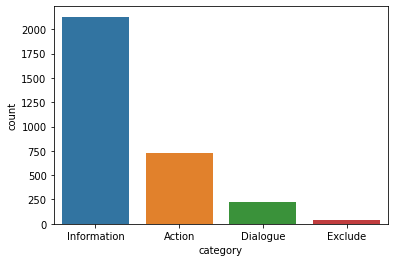

In [17]:
import seaborn as sns
# check distribution of target column i.e. category
sns.countplot(data=df, x='category')

In [19]:
df.category_confidence

0       1.0000
1       1.0000
2       1.0000
3       1.0000
4       1.0000
         ...  
3113    0.8245
3114    0.5952
3115    1.0000
3116    0.8973
3117    1.0000
Name: category_confidence, Length: 3118, dtype: float64

In [21]:
# check distribution of the column - category_confidence
df.category_confidence.value_counts()

1.0000    2430
0.6614      35
0.6643      33
0.6747      32
0.6775      29
          ... 
0.8547       1
0.6641       1
0.8578       1
0.9089       1
0.8245       1
Name: category_confidence, Length: 194, dtype: int64

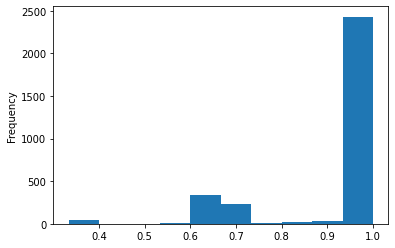

In [25]:
df.category_confidence.plot(kind='hist')

In [26]:
import numpy as np

np.mean(df.category_confidence), np.std(df.category_confidence)

(0.9254599743425256, 0.1478499278842167)

Category confidence <1 & category is 'exclude'

In [32]:
df.loc[(df.category_confidence < 1) & (df.category=='Exclude')]

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,category,category_confidence,category_gold,id,screenname,text
144,662822545,False,finalized,3,2015-02-18T08:59:00,Exclude,0.3390,NaN,466231000000000000,barclayswealth,...Response: John Roberts: Don�۪t look at the...
331,662822758,False,finalized,3,2015-02-18T12:42:00,Exclude,0.3366,NaN,453899000000000000,Citi,Don't compete. Collaborate. #BestCareerAdvice ...
616,662823044,False,finalized,3,2015-02-18T13:33:00,Exclude,0.6622,NaN,475323000000000000,Citi,RT @DavidAguiR #CitiVolunteers Reforestando #G...
1028,662823476,False,finalized,3,2015-02-18T09:07:00,Exclude,0.6743,NaN,327418000000000000,DanoneGroup,"Au #Br̩sil, Danone a lanc̩ le programme Jaguar..."
1054,662823502,False,finalized,3,2015-02-18T12:23:00,Exclude,0.6700,NaN,265837000000000000,DanoneGroup,Danone s'int̩resse �� la mobilit̩ de ses colla...
1137,662823585,False,finalized,3,2015-02-18T03:51:00,Exclude,0.6496,NaN,270835000000000000,DanoneGroup,@DownTo_Earth_ @Planetworkshops merci beaucoup!
1143,662823591,False,finalized,3,2015-02-18T04:21:00,Exclude,0.3427,NaN,271269000000000000,DanoneGroup,RT @Danone_Be : Greener Packaging Awards: Dano...
1204,662823652,False,finalized,3,2015-02-18T13:57:00,Exclude,0.6662,NaN,461137000000000000,DanoneGroup,Sain par l'̩ducation comme aux US avec Partner...
1207,662823655,False,finalized,3,2015-02-18T08:53:00,Exclude,0.6775,NaN,461128000000000000,DanoneGroup,Notre assembl̩e g̩n̩rale s�۪ouvre avec la pr̩s...
1348,662823805,False,finalized,3,2015-02-18T12:46:00,Exclude,0.3396,NaN,457222000000000000,Merck,@DCWalkofHope Proud to be a sponsor!


In [33]:
np.mean(df.loc[(df.category_confidence < 1) & (df.category=='Exclude')].category_confidence)

0.56865

In [36]:
# remove those observations where category_confidence < 1 and category = Exclude
df = df.loc[(df['category_confidence'] >= 1) & (df['category'] != 'Exclude')]
df

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,category,category_confidence,category_gold,id,screenname,text
0,662822308,False,finalized,3,2015-02-18T04:31:00,Information,1.0,NaN,436528000000000000,Barclays,Barclays CEO stresses the importance of regula...
1,662822309,False,finalized,3,2015-02-18T13:55:00,Information,1.0,NaN,386013000000000000,Barclays,Barclays announces result of Rights Issue http...
2,662822310,False,finalized,3,2015-02-18T08:43:00,Information,1.0,NaN,379580000000000000,Barclays,Barclays publishes its prospectus for its �5.8...
3,662822311,False,finalized,3,2015-02-18T09:13:00,Information,1.0,NaN,367530000000000000,Barclays,Barclays Group Finance Director Chris Lucas is...
4,662822312,False,finalized,3,2015-02-18T06:48:00,Information,1.0,NaN,360385000000000000,Barclays,Barclays announces that Irene McDermott Brown ...
...,...,...,...,...,...,...,...,...,...,...,...
3107,677278307,True,golden,7,NaN,Information,1.0,Information,403911000000000000,Citi,We're grateful for 2x honors @ChamberBCLC Citi...
3108,677278308,True,golden,9,NaN,Information,1.0,Information,392323000000000000,Nestle,We̢���re the 1. to sign up to a European init...
3109,677278309,True,golden,6,NaN,Information,1.0,Information,394872000000000000,Nestle,We̢���re working hard to do all we can to pro...
3115,677278315,True,golden,10,NaN,Information,1.0,Information,477073000000000000,Nestle,"Yesterday, these #HealthyKids lit up Broadway ..."


In [37]:
# extract features i.e the column - text and target i.e the column - category
features = df['text']
target = df['category']

### Task 2: Text preprocessing

We will do the below pre-processing tasks on the text
- tokenizing the sentences
- replace the urls with a placeholder
- removing non [ascii](https://en.wikipedia.org/wiki/ASCII) characters
- text normalizing using lemmatization
    - https://en.wikipedia.org/wiki/Lemmatisation
    - https://en.wikipedia.org/wiki/Lemma_(morphology)

In [42]:
# let's observe a text in the dataset, extract the first text
df.text.iloc[0]

'Barclays CEO stresses the importance of regulatory and cultural reform in financial services at Brussels conference  http://t.co/Ge9Lp7hpyG'

In [40]:
df.text[0]

'Barclays CEO stresses the importance of regulatory and cultural reform in financial services at Brussels conference  http://t.co/Ge9Lp7hpyG'

In [39]:
features[0]

'Barclays CEO stresses the importance of regulatory and cultural reform in financial services at Brussels conference  http://t.co/Ge9Lp7hpyG'

In [43]:
# now extract the third text from this dataset
features[2]

'Barclays publishes its prospectus for its �5.8bn Rights Issue: http://t.co/YZk24iE8G6'

In [54]:
from nltk.corpus import stopwords

nltk.download('stopwords')

len(stopwords.words('english')), type(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(179, list)

Return a tokenized copy of text, using NLTK's recommended word tokenizer (currently nltk.tokenize.treebank.TreebankWordTokenizer along with nltk.tokenize.punkt.PunktSentenceTokenizer for the specified language).

https://www.nltk.org/api/nltk.tokenize.html

In [60]:
from nltk import word_tokenize

nltk.download('punkt')

s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"

word_tokenize(s0)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['This',
 'is',
 'a',
 'cooool',
 '#',
 'dummysmiley',
 ':',
 ':',
 '-',
 ')',
 ':',
 '-P',
 '<',
 '3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '-',
 '>',
 '<',
 '--']

In [84]:
# import re library for regular expressions
import re
# import nltk library
import nltk
# import stopwords from nltk library
from nltk.corpus import stopwords  # https://en.wikipedia.org/wiki/Stop_word

# download the stopwords and wordnet corpus
nltk.download('wordnet')
nltk.download('stopwords')

# extract the english stopwords and save it to a variable
stoplist = stopwords.words('english')

# import word_tokenize from nltk library
from nltk.tokenize import word_tokenize

# import WordNetLemmatizer from nltk library
from nltk.stem import WordNetLemmatizer

# write a regular expression to identify urls in text
url_regex = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

# write a regular expression to identify non-ascii characters in text
non_ascii_regex = r'[^\x00-\x7F]+'

# write a function to tokenize text after performing preprocessing 
def tokenize(text):
    
    # use library re to replace urls by token - urlplaceholder
    text = re.sub(url_regex, 'urlplaceholder', text)  # https://docs.python.org/3/library/re.html#re.sub
    
    # use library re to replace non ascii characters by a space (emojis)
    text = re.sub(non_ascii_regex, ' ', text)

    # use word_tokenize to tokenize the sentences
    tokens = word_tokenize(text)
    
    # instantiate an object of class WordNetLemmatizer  # instantiate <- represent as or by an instance.
    lemmatizer = WordNetLemmatizer()
    
    # use a list comprehension to lemmatize the tokens and remove the the stopwords
    clean_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stoplist]

    # return the tokens
    return clean_tokens

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Task 3: EDA

In this task, we will do exploratory data analysis to check if there are any new features that we can generate based on the existing text that we have in the dataset. I have come up with these two assumptions. What others can you think of?

#### What makes these different??
- `information` (objective statements about the company or it's activities), 
- `dialog` (replies to users, etc.), or 
- `action` (messages that ask for votes or ask users to click on links, etc.). 

**Hypothesis 1:** The length of the text in each category might be different from each other

**Hypothesis 2:** The total number of URLs that are present in text might be different in each category

**Hypothesis 3:** If an action means clicking on a URL, then `action` may constently have URLs or have more URLs than `dialog` or `information`

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


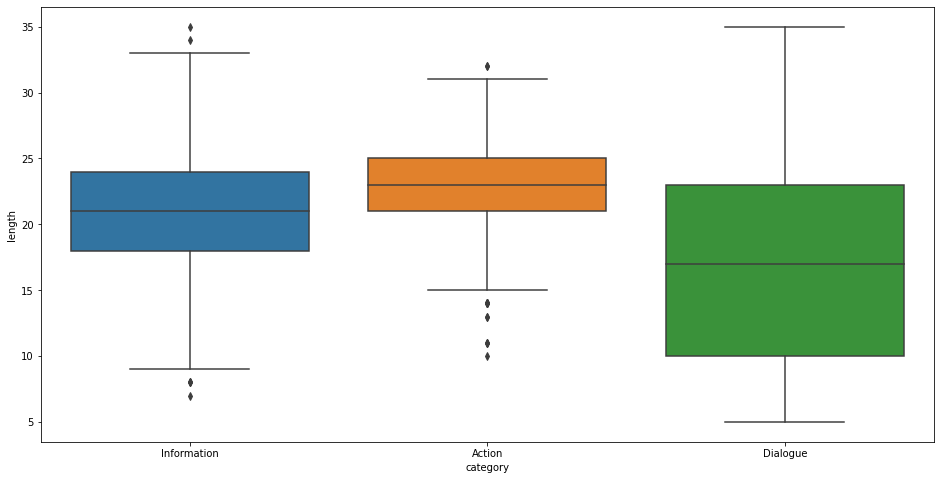

In [85]:
import matplotlib.pyplot as plt

# create a new column in the original dataset - 'length' to capture length of each text
df['length'] = df['text'].apply(lambda x: len(word_tokenize(x)))

# use seaborn boxplot to visualize the pattern in length for each category
fig = plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='category', y='length')

In [86]:
features[0]

'Barclays CEO stresses the importance of regulatory and cultural reform in financial services at Brussels conference  http://t.co/Ge9Lp7hpyG'

In [87]:
# create a new column in the original dataset - 'url_count' to capture total count of urls present in each text
df['url_count'] = df['text'].apply(lambda x: len(re.findall(url_regex, x)))

# use pandas crosstab to see the distibution of different url counts in each category
pd.crosstab(df['category'], df['url_count'], normalize=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


url_count,0,1,2
category,,,
Action,0.014565,0.166042,0.009155
Dialogue,0.032876,0.018727,0.000000
Information,0.205576,0.533916,0.019143


Note: that all adds up to 1.0

In [88]:
np.sum(pd.crosstab(df['category'], df['url_count'], normalize=True))

url_count
0    0.253017
1    0.718685
2    0.028298
dtype: float64

In [89]:
np.sum(np.sum(pd.crosstab(df['category'], df['url_count'], normalize=True)))

1.0

### Task 4: Creating custom transformers

An estimator is any object that learns from data, whether it's a classification, regression, or clustering algorithm, or a transformer that extracts or filters useful features from raw data. Since estimators learn from data, they each must have a `fit` method that takes a dataset.

There are two kinds of estimators - `Transformer Estimators` i.e. transformers in short and `Predictor Estimators` i.e. predictor in short. In transformers we also need to have another method `transform` and predictors need to have another method `predict`.

Some examples of `transformers` are - CountVectorizer, TfidfVectorizer, MinMaxScaler, StandardScaler etc

Some examples of `predictors` are - LinearRegression, LogisticRegression, RandomForestClassifier etc

In [90]:
# create a custom transformer LengthExtractor to extract length of each sentences
from sklearn.base import BaseEstimator, TransformerMixin
# https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html
# https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html

class LengthExtractor(BaseEstimator, TransformerMixin):

    def compute_length(self, text):
        return len(word_tokenize(text))

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        X_length = pd.Series(X).apply(self.compute_length)
        return pd.DataFrame(X_length)

In [96]:
# create a custom transformer UrlCounter to count number of urls in each sentences

class UrlCounter(BaseEstimator, TransformerMixin):

    def count_url(self, text):
        return len(re.findall(url_regex, text))

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        url_count = pd.Series(X).apply(self.count_url)
        return pd.DataFrame(url_count)


### Task 5: Model Building using FeatureUnion

Feature union applies a list of transformer objects in parallel to the input data, then concatenates the results. This is useful to combine several feature extraction mechanisms into a single transformer.

![alt text](pipeline.png "nlp pipeline")

In [97]:
# import RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# import Pipeline and FeatureUnion from sklearn
from sklearn.pipeline import Pipeline, FeatureUnion

# import CountVectorizer, TfidfTransformer from sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer


In [98]:
# create an instance of Pipeline class
pipeline = Pipeline([
                     # create a FeatureUnion pipeline
                     ('features', FeatureUnion([
                                                ('text_pipeline', Pipeline([
                                                                            # add a pipeline element to extract features using CountVectorizer and TfidfTransformer
                                                                            ('vect', CountVectorizer(tokenizer=tokenize)),
                                                                            ('tfidf', TfidfTransformer())
                                                                            ])),
                                                # add the pipeline element - LengthExtractor to extract lenght of each sentence as feature
                                                ('text_len', LengthExtractor()),
                                                # add another pipeline element - UrlCounter to extract url counts in each sentence as feature
                                                ('url_count', UrlCounter()),
                                                ])),
                     # use the predictor estimator RandomForestClassifier to train the model
                     ('clf', RandomForestClassifier())
                     ])

In [99]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [100]:
# use pipeline.fit method to train the model
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('features',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('text_pipeline',
                                                 Pipeline(memory=None,
                                                          steps=[('vect',
                                                                  CountVectorizer(analyzer='word',
                                                                                  binary=False,
                                                                                  decode_error='strict',
                                                                                  dtype=<class 'numpy.int64'>,
                                                                                  encoding='utf-8',
                                                                                  input='content',
                                                                                  low

### Task 6: Model Evaluation

Now, once the model is trained, in this task we will evaluate how the model behaves in the test data

In [105]:
# use the method pipeline.predict on X_test data to predict the labels
preds = pipeline.predict(X_test)

preds[-5:]

array(['Information', 'Action', 'Information', 'Information',
       'Information'], dtype=object)

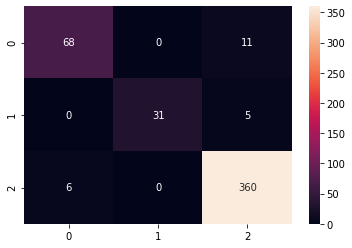

In [111]:
# create the confustion matrix, import confusion_matrix from sklearn
from sklearn.metrics import confusion_matrix

# count the number of labels
labels = np.unique(preds)

# use sns.heatmap on top of confusion_matrix to show the confusuin matrix
sns.heatmap(confusion_matrix(y_test, preds, labels=labels), annot=True, fmt='.0f')

In [115]:
# create the classification report, import classification_report from sklearn
from sklearn.metrics import classification_report

# apply the function classification_report on y_test, y_pred and print it
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      Action       0.92      0.86      0.89        79
    Dialogue       1.00      0.86      0.93        36
 Information       0.96      0.98      0.97       366

    accuracy                           0.95       481
   macro avg       0.96      0.90      0.93       481
weighted avg       0.95      0.95      0.95       481



In [116]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.9542619542619543

### Task 7: Conclusion and next steps

How can you take this further? What more can you do?

- hyper parameter tuning
- more feature engineering
- feature selection
- trying different predictors

In [ ]:
# optional: your code here